<a href="https://colab.research.google.com/github/IrisFDTD/OPTICS-UNIZAR/blob/main/Topic_9/chapter9_michelson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Licencia Creative Commons" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a><br /><span xmlns:dct="http://purl.org/dc/terms/" property="dct:title"></span> The following notes written by  <span xmlns:cc="http://creativecommons.org/ns#" property="cc:attributionName">Sergio Gutiérrez Rodrigo (<sergut@unizar.es>) </span>. Distributed under  <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">License Creative Commons Atribución-NoComercial-CompartirIgual 4.0 Internacional</a>

```
Departamento de Física Aplicada
Universidad de Zaragoza
Instituto de Nanociencia y Materiales de Aragón (INMA)
C/ Pedro Cerbuna, 12, 50009, Zaragoza, España
```






---
# **Óptica - Tema 9 - Interferómetro de Michelson**

---

# Funciones comunes

In [ ]:
def plot_figure(x,y,xlabel,ylabel,path,pngname,**kwargs):
    import matplotlib.pyplot as plt
    plt.style.use('ggplot') #('seaborn-whitegrid')
    '''
    Función para dibujar funciones f=f(x)
    '''

    '''
    'seaborn-ticks', 'ggplot', 'dark_background', 'bmh', 'seaborn-poster',
    'seaborn-notebook', 'fast', 'seaborn', 'classic', 'Solarize_Light2',
    'seaborn-dark', 'seaborn-pastel', 'seaborn-muted', '_classic_test',
    'seaborn-paper', 'seaborn-colorblind', 'seaborn-bright', 'seaborn-talk',
    'seaborn-dark-palette', 'tableau-colorblind10', 'seaborn-darkgrid',
    'seaborn-whitegrid', 'fivethirtyeight', 'grayscale', 'seaborn-white', 'seaborn-deep']
    '''
    xmin=kwargs.get('xmin')
    xmax=kwargs.get('xmax')
    ymin=kwargs.get('ymin')
    ymax=kwargs.get('ymax')
    labels=kwargs.get('labels',[])
    symbol_size=kwargs.get('symbol_size',0)
    line_width=kwargs.get('line_width',0.5)

    colors,line = [],[]
    labels = labels
    colors =['blue']
    for i in range(len(y)):
      colors.append('red')
    line = ["-"]
    for i in range(len(y)):
      line.append('-')
      line.append('--')
    dpi=220; figy=2;figx=1.5*figy
    fig, ax = plt.subplots(num=None, dpi=dpi,figsize=(figx,figy), facecolor='w', edgecolor='k')
    for i in range(0,len(y)):
        ax.plot(x[i],y[i], ls=line[i], label=labels[i],
                marker='.',markersize=symbol_size,linewidth=line_width)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_xlim(xmin,xmax)
    ax.set_ylim(ymin,ymax)
    #ax.set_ylabel("Scattering coefficients")
    ax.legend(bbox_to_anchor=(0,1.02,1,0.2), loc="lower left",
                mode="expand", borderaxespad=0, ncol=2)
    #ax.grid(b=None)
    fig.savefig(path+pngname+".png", dpi=dpi, facecolor="#f1f1f1")
pass


# Inteferómetro de Michelson

m=2*d/lambda (maximum at origin)= 73.8


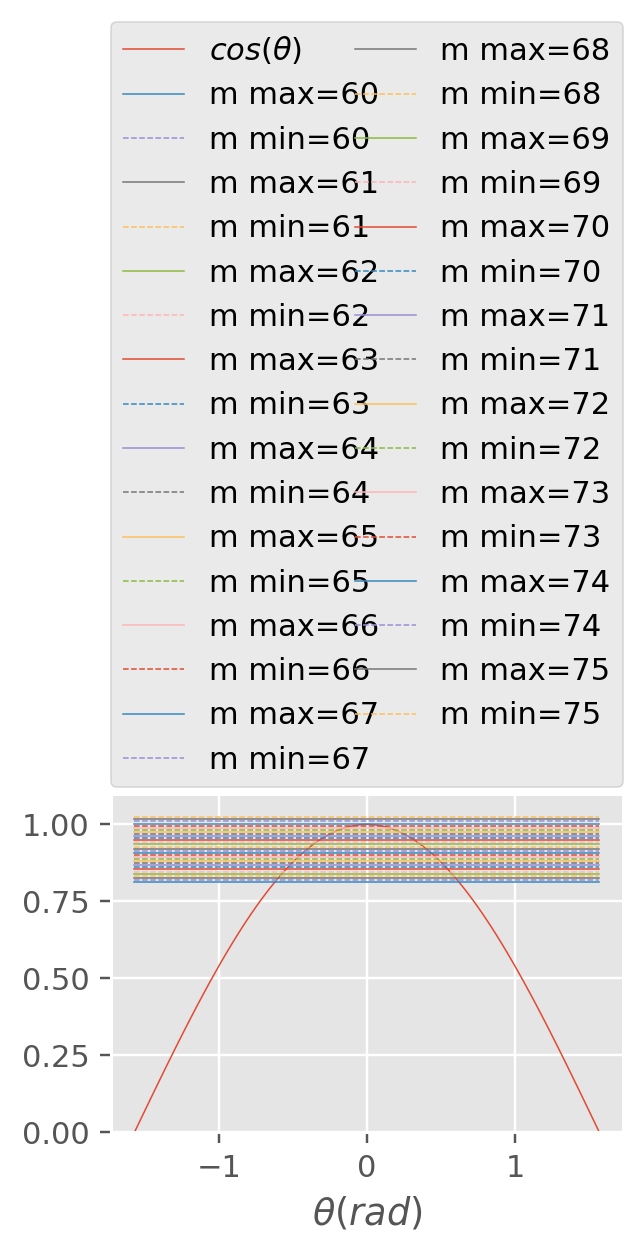

In [ ]:
from math import pi
import numpy as np

def maximo(m,lo,d):
  return m*lo/(2.0*d)

def minimo(m,lo,d):
  return (2.0*m+1)*lo/(4.0*d)

lo=600.0 #nm
d=30*lo*1.23
m_origin=2*d/lo
print("m=2*d/lambda (maximum at origin)=",m_origin)
theta=np.linspace(-pi/2,pi/2,100)
ones=np.ones(100)
xplot,yplot = [],[]
xplot.append(theta)
yplot.append(np.cos(theta))
labels=[r'$cos(\theta)$']
Mmin=60
Mmax=76
for i in range(Mmin,Mmax):
  xplot.append(theta)
  yplot.append(ones*maximo(i,lo,d))
  labels.append("m max="+str(i))
  xplot.append(theta)
  yplot.append(ones*minimo(i,lo,d))
  labels.append("m min="+str(i))


plot_figure(xplot,yplot,xlabel=r'$\theta (rad)$',ylabel='',path='./',pngname='fraunhofer',
            labels=labels,ymin=0.0,ymax=1.1)

In [ ]:
from scipy.optimize import root
import numpy as np

# Define the real function whose zeros you want to find
def f(m,lo,d):
    def max_cond(theta):
      return np.cos(theta)- maximo(m,lo,d)
    return max_cond

# Find the root using the root function
# Initial guess for the root
theta_seed = 1.2
theta_list=[]
for m in range(Mmin,Mmax):
  func=f(m,lo,d)
  result = root(func, theta_seed)
  # Check if the root-finding was successful
  if result.success:
      print("Root found at theta =", result.x," for m=",m)
      theta_list.append(result.x)
  else:
      print("Root not found") #, result.message)

# Distance between two maxima
print("\nDistance between two maxima:")
for i in range(0,len(theta_list)-1):
  delta_theta=lo/(2.0*d*np.sin(theta_list[i]))
  delta=theta_list[i]-theta_list[i+1]
  print("i=",i)
  print(delta_theta,delta)

Root found at theta = [0.62149632]  for m= 60
Root found at theta = [0.59783121]  for m= 61
Root found at theta = [0.57331329]  for m= 62
Root found at theta = [0.54782656]  for m= 63
Root found at theta = [0.52122737]  for m= 64
Root found at theta = [0.49333418]  for m= 65
Root found at theta = [0.46391195]  for m= 66
Root found at theta = [0.43264707]  for m= 67
Root found at theta = [0.39910485]  for m= 68
Root found at theta = [0.36265187]  for m= 69
Root found at theta = [0.32229975]  for m= 70
Root found at theta = [0.27634308]  for m= 71
Root found at theta = [0.22131444]  for m= 72
Root found at theta = [0.14737537]  for m= 73
Root not found
Root not found

Distance between two maxima:
i= 0
[0.02327193] [0.02366512]
i= 1
[0.0240741] [0.02451792]
i= 2
[0.02498096] [0.02548673]
i= 3
[0.02601627] [0.02659919]
i= 4
[0.02721212] [0.02789319]
i= 5
[0.02861304] [0.02942223]
i= 6
[0.03028302] [0.03126488]
i= 7
[0.03231798] [0.03354223]
i= 8
[0.03486967] [0.03645298]
i= 9
[0.03819577] 

Condition at origin= 0.010840108401083959


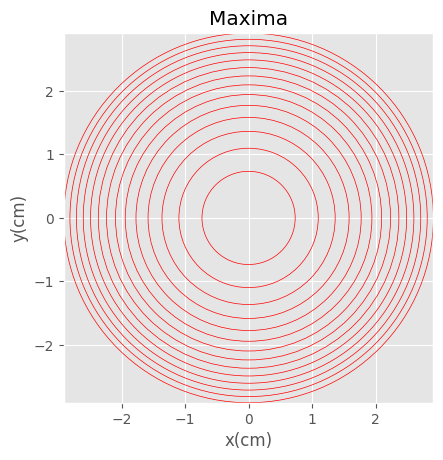

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Plot in focal plane of a lens
fp=5.0 #cm (image focal distance)
radii=fp*np.sin(np.array(theta_list))

# Plot the circles
fig, ax = plt.subplots()

for radius in radii:
    circle = plt.Circle((0, 0), radius, edgecolor='red', facecolor='none')
    ax.add_patch(circle)

# Add a solid point at the center
at_center=f(int(m_origin),lo,d)(0.0)
print("Condition at origin=",at_center)
if(at_center<1e-5):
  ax.scatter(0, 0, color='red', marker='o', label='Center Point')

# Set aspect ratio to be equal and adjust the plot limits
ax.set_aspect('equal', adjustable='box')
ax.set_xlim(-max(radii), max(radii))
ax.set_ylim(-max(radii), max(radii))

# Add labels and title
ax.set_xlabel('x(cm)')
ax.set_ylabel('y(cm)')
ax.set_title('Maxima')

# Show the plot
plt.show()
